<h1 align=center><font size = 5> Cân bằng dữ liệu </font></h1>

In [1]:
import sys
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path
lib_path =  path.abspath(path.join('' ,"../../api/common"))
sys.path.insert(1, lib_path)
from transform_split_data import transform_split_data
from predict import predict, evaluate
from filter_outlier import filter_outlier_value_range
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%load_ext autotime
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


time: 125 ms


### <span style="color:blue">1.Load data</span>

In [2]:
# Load dữ liệu
df = pd.read_csv('..\\pre_process_data\\pre_process_data.csv', encoding='utf-8')
data_df = df.copy()
data_df

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,1,58.378378
494337,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,0,57.857143
494338,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,3.0,2.0,,1009.0,1,2,,0,57.754011
494339,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,0.0,2.0,,411.0,1,2,,0,57.497782


time: 5.38 s


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494341 entries, 0 to 494340
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id$Year                      494341 non-null  int64  
 1   id$MonthDay                  494341 non-null  int64  
 2   id$JyoCD                     494341 non-null  int64  
 3   id$Kaiji                     494341 non-null  int64  
 4   id$Nichiji                   494341 non-null  int64  
 5   id$RaceNum                   494341 non-null  int64  
 6   race_id                      494341 non-null  int64  
 7   Year                         494341 non-null  int64  
 8   Month                        494341 non-null  int64  
 9   RaceInfo$TokuNum             494341 non-null  int64  
 10  RaceInfo$Nkai                494341 non-null  int64  
 11  GradeCD                      494341 non-null  object 
 12  JyokenInfo$SyubetuCD         494341 non-null  int64  
 13 

In [4]:
train_data = data_df[data_df['id$Year']<2018]
train_data

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475191,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,1,61.992620
475192,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,0,61.165049
475193,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,0,61.538462
475194,2017,1228,9,5,9,12,34534,2017,12,0,...,1.0,0.0,2.0,,0.0,1,1,,0,60.943168


time: 469 ms


### <span style="color:blue">2.Cân bằng số trận theo cự ly</span> 

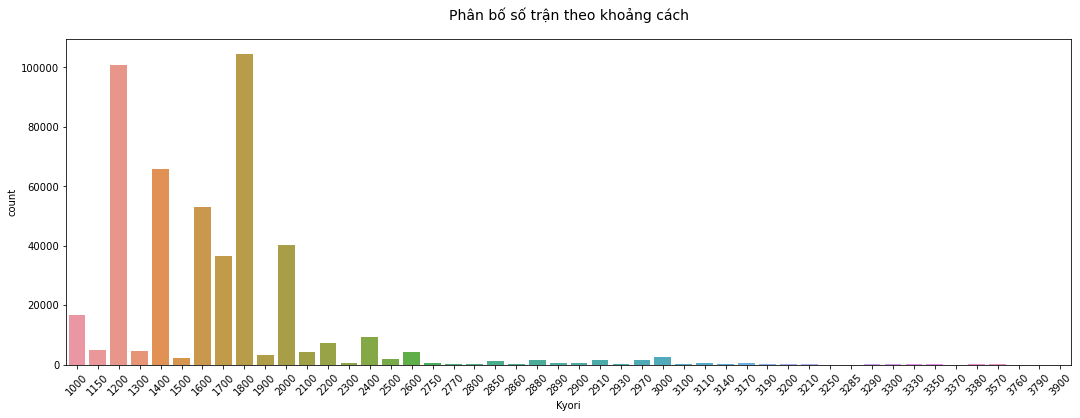

time: 1 s


In [5]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=train_data)
plt.title('Phân bố số trận theo khoảng cách', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

In [6]:
main_Kyori_df = train_data[train_data['Kyori']<=2600][['race_id', 'KettoNum', 'Kyori']]
main_Kyori_df

,race_id,KettoNum,Kyori
0,1,2005107051,1200
1,1,2005102028,1200
2,1,2005104156,1200
3,1,2005105319,1200
4,1,2005101044,1200
...,...,...,...
475191,34534,2012101892,1400
475192,34534,2013104774,1400
475193,34534,2012101704,1400
475194,34534,2012102404,1400


time: 343 ms


In [7]:
y = main_Kyori_df['Kyori']
Counter(y).most_common()

[(1800, 104500),
 (1200, 100744),
 (1400, 65872),
 (1600, 53017),
 (2000, 40308),
 (1700, 36631),
 (1000, 16672),
 (2400, 9422),
 (2200, 7443),
 (1150, 4937),
 (1300, 4744),
 (2600, 4399),
 (2100, 4353),
 (1900, 3282),
 (1500, 2126),
 (2500, 1772),
 (2300, 536)]

time: 250 ms


In [8]:
X = main_Kyori_df.drop('Kyori', axis=1)
X

,race_id,KettoNum
0,1,2005107051
1,1,2005102028
2,1,2005104156
3,1,2005105319
4,1,2005101044
...,...,...
475191,34534,2012101892
475192,34534,2013104774
475193,34534,2012101704
475194,34534,2012102404


time: 172 ms


In [9]:
oversample = RandomOverSampler()
X_new, y_new  = oversample.fit_resample(X, y)
Counter(y_new)

Counter({1200: 104500,
         1800: 104500,
         1400: 104500,
         1600: 104500,
         2000: 104500,
         2500: 104500,
         2200: 104500,
         2400: 104500,
         1000: 104500,
         1700: 104500,
         2600: 104500,
         2100: 104500,
         1300: 104500,
         1900: 104500,
         2300: 104500,
         1150: 104500,
         1500: 104500})

time: 734 ms


In [12]:
X_new

,race_id,KettoNum
0,1,2005107051
1,1,2005102028
2,1,2005104156
3,1,2005105319
4,1,2005101044
...,...,...
1776495,9372,2007106537
1776496,22635,2011104078
1776497,31592,2013100900
1776498,27190,2012104461


time: 140 ms


In [10]:
new_train_data = pd.merge(X_new, train_data, on=['race_id', 'KettoNum'], how='left')
new_train_data.dropna(inplace=True)
new_train_data

,race_id,KettoNum,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,Year,Month,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,1,2005107051,2008,105,6,1,1,1,2008,1,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,1,2005102028,2008,105,6,1,1,1,2008,1,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,1,2005104156,2008,105,6,1,1,1,2008,1,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,1,2005105319,2008,105,6,1,1,1,2008,1,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,1,2005101044,2008,105,6,1,1,1,2008,1,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776495,9372,2007106537,2010,918,1,2,3,10,2010,9,...,2.0,0.0,2.0,,0.0,1,2,,1,56.968959
1776496,22635,2011104078,2014,720,2,2,6,4,2014,7,...,1.0,0.0,1.0,,0.0,1,2,,0,56.692913
1776497,31592,2013100900,2017,225,10,1,5,11,2017,2,...,1.0,1.0,2.0,,1075.0,1,2,,0,57.777778
1776498,27190,2012104461,2015,1114,3,3,5,7,2015,11,...,1.0,0.0,2.0,,411.0,1,2,,0,56.165617


time: 8.81 s


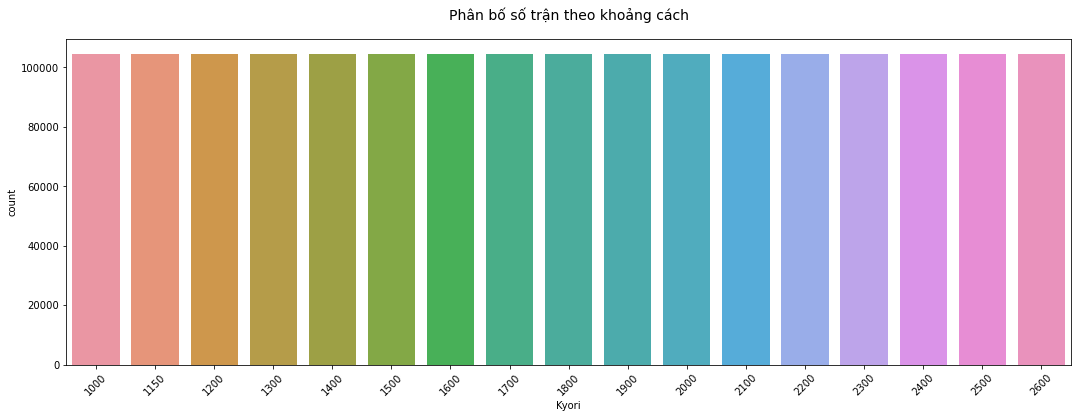

time: 547 ms


In [11]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=new_train_data)
plt.title('Phân bố số trận theo khoảng cách', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

In [13]:
balance_id = X_new.to_csv('balance_id.csv', index=False)

time: 2.5 s
